In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df_scaled = pd.read_csv('../../clustering_data.csv')

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df)
#df_scaled = pd.DataFrame(df_scaled, columns=['pca_0', 'pca_1'])
#df_scaled

,pca_0,pca_1
0,0.203614,0.506445
1,0.333841,0.013796
2,0.333819,0.745865
3,0.203614,0.506445
4,0.203606,0.750468
...,...,...
5660,0.066427,0.255122
5661,0.068188,0.502975
5662,0.665136,0.013168
5663,0.664918,0.503561


In [ ]:
#df.describe()

,pca_0,pca_1
count,5.665000e+03,5.665000e+03
mean,7.023900e-17,1.605463e-16
std,4.679269e+00,1.111146e+00
min,-7.199437e+00,-1.905773e+00
25%,-4.162811e+00,-8.676382e-01
50%,8.052126e-01,1.339526e-01
75%,3.808948e+00,1.123778e+00
max,7.878951e+00,2.186194e+00


In [ ]:
df_scaled.describe()

,pca_0,pca_1
count,5665.000000,5665.000000
mean,0.477467,0.465735
std,0.310330,0.271543
min,0.000000,0.000000
25%,0.201389,0.253701
50%,0.530869,0.498471
75%,0.730077,0.740365
max,1.000000,1.000000


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

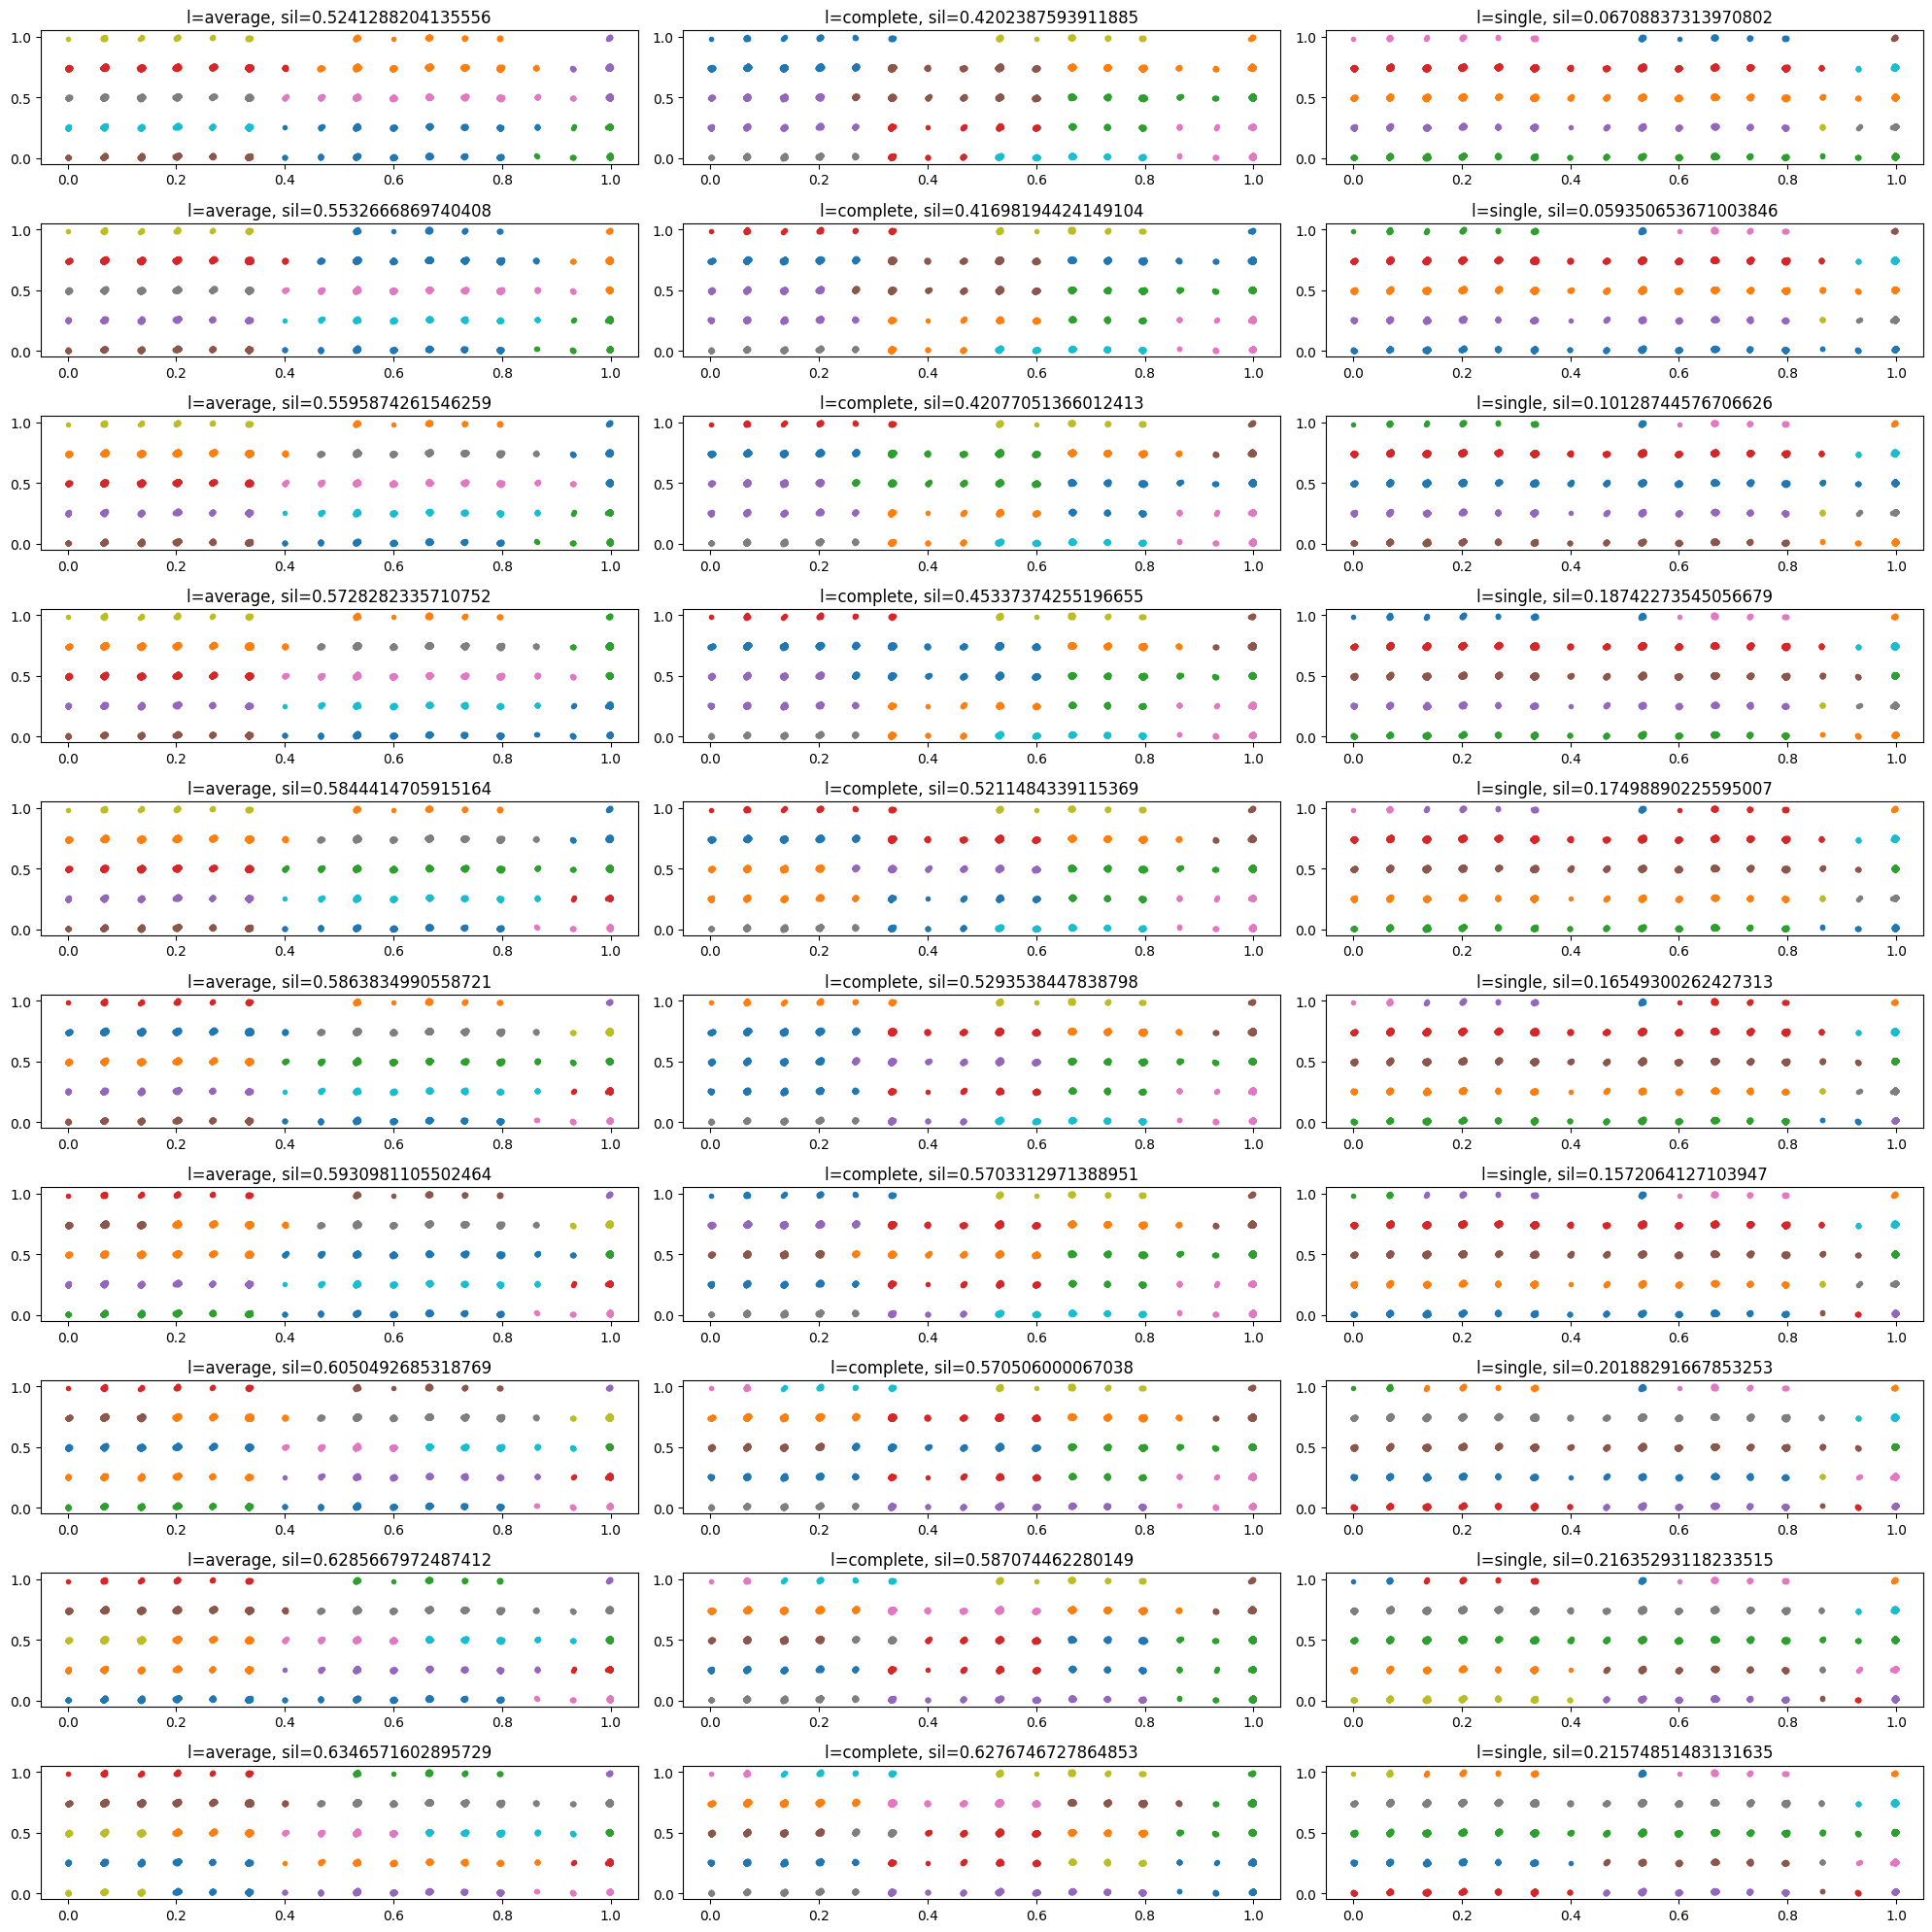

In [ ]:
num_of_clusters = range(10,20)
linkages = ['average', 'complete', 'single']

fig = plt.figure(figsize=(20,20))
plot_index = 1
silhouettes = []

for cluster_num in num_of_clusters:
  for linkage in linkages:
    model = AgglomerativeClustering(n_clusters=cluster_num, linkage=linkage)
    model.fit(df_scaled)

    if linkage == 'average':
      silhouettes.append(silhouette_score(df_scaled, model.labels_))

    fig.add_subplot(len(num_of_clusters), len(linkages), plot_index)
    plot_index += 1
    for cluster_label in range(cluster_num):
      cluster = df_scaled[cluster_label == model.labels_]
      plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'cluster {cluster_label}', marker='.')
    plt.title(f'l={linkage}, sil={silhouette_score(df_scaled, model.labels_)}')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'silhouette score')

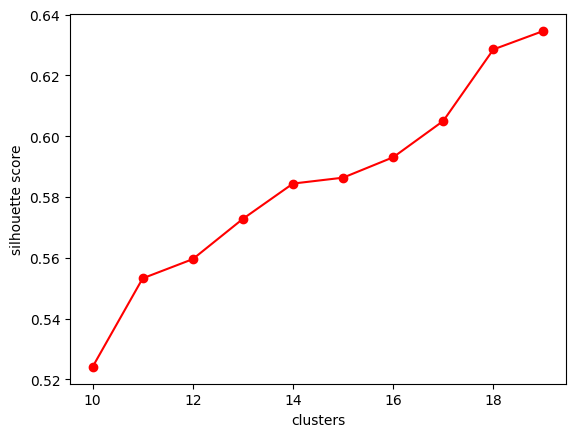

In [ ]:
plt.plot(num_of_clusters, silhouettes, marker='o', c='r', )
plt.xlabel('clusters')
plt.ylabel('silhouette score')

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
z = linkage(df_scaled, method='average')
z

array([[0.00000000e+00, 3.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 5.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.13200000e+04, 1.13220000e+04, 5.26540574e-01, 2.61800000e+03],
       [1.13240000e+04, 1.13250000e+04, 5.64371623e-01, 3.04700000e+03],
       [1.13260000e+04, 1.13270000e+04, 6.63767172e-01, 5.66500000e+03]])

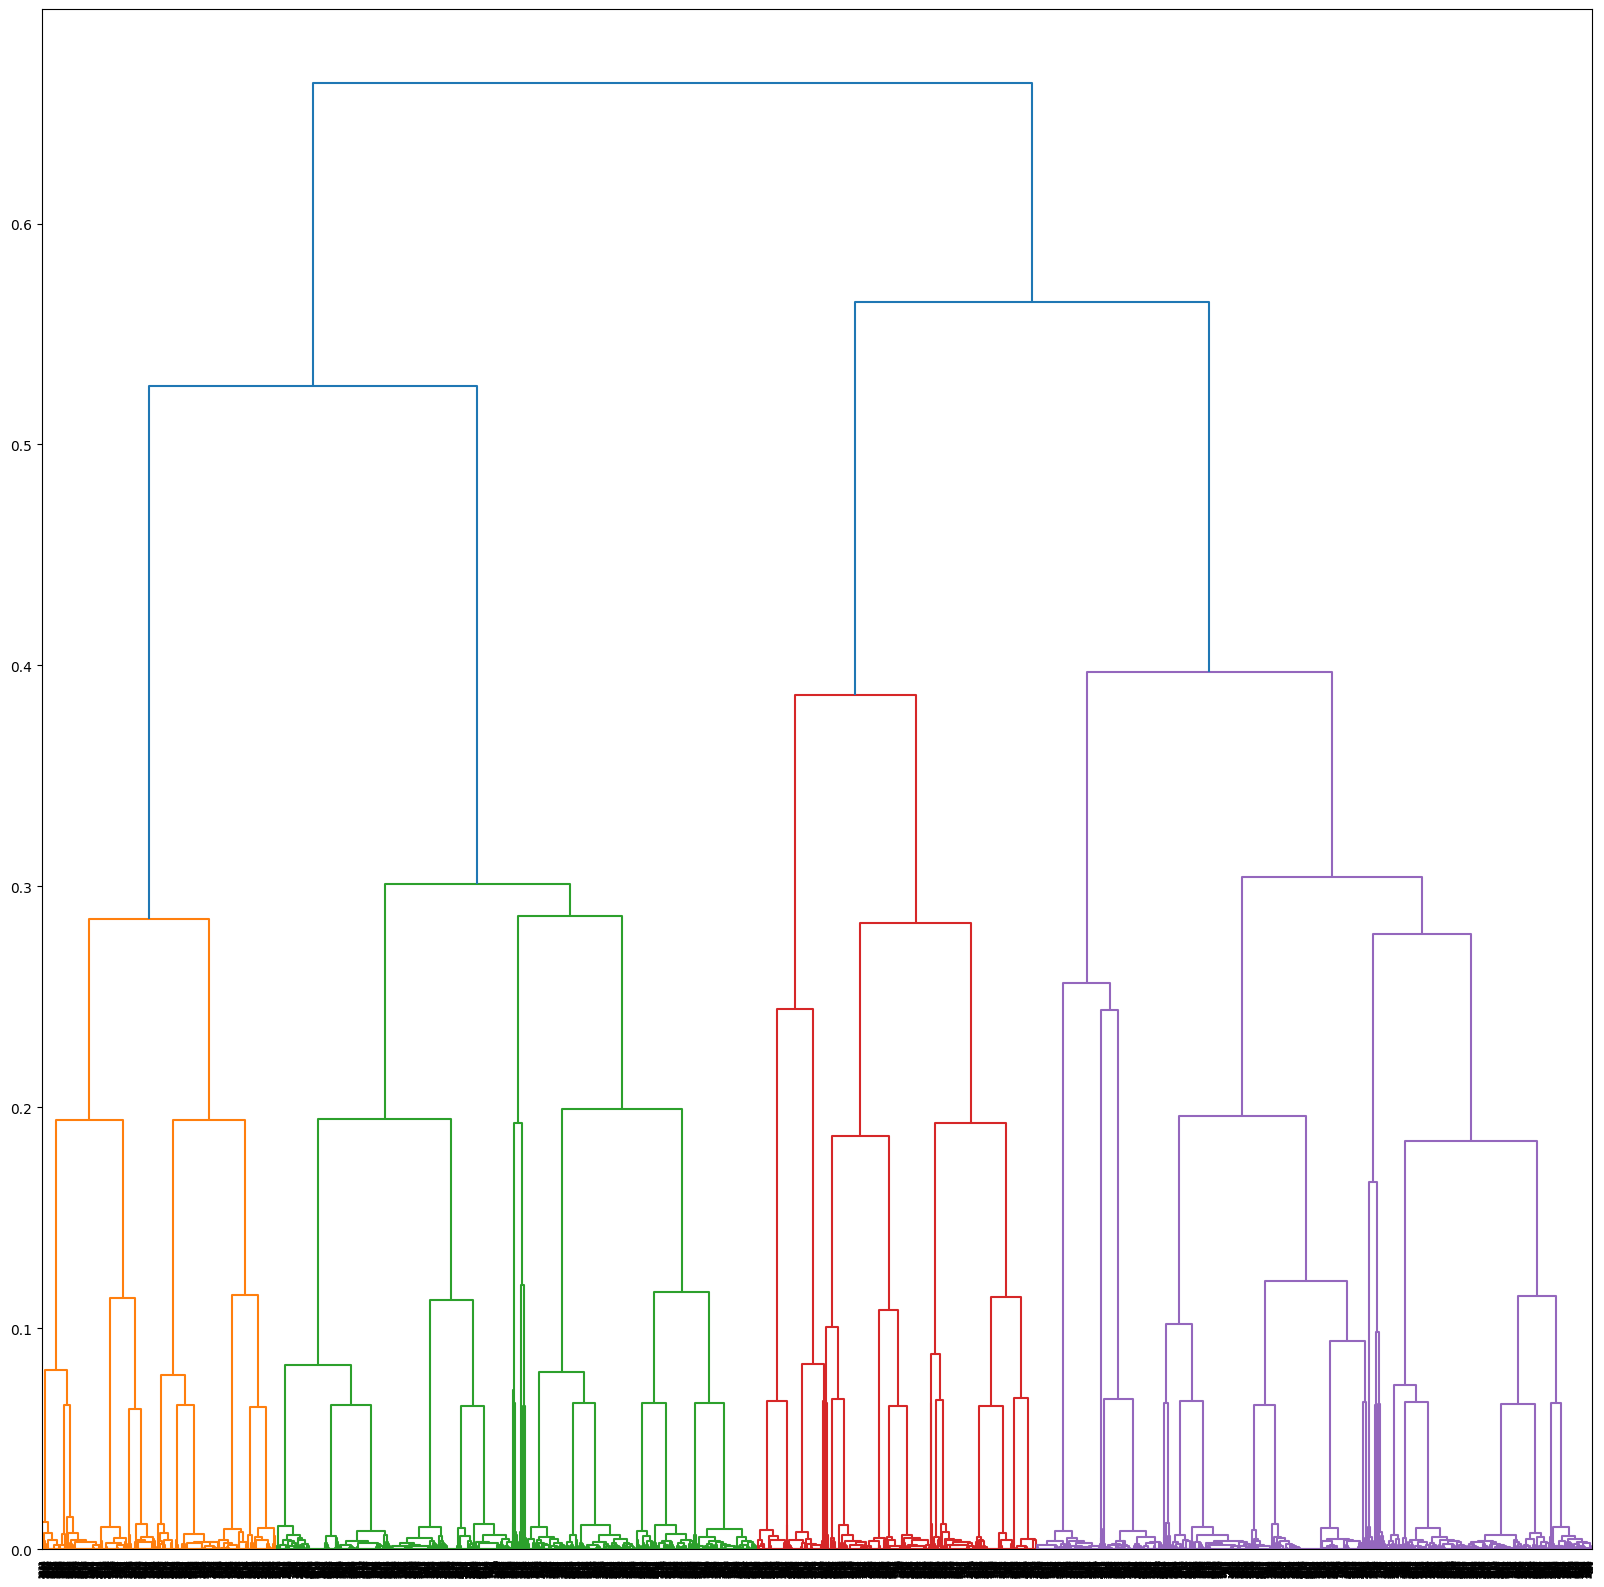

In [ ]:
fig = plt.figure(figsize=(20,20))
_ = dendrogram(z)
fig.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=19, linkage='average')
model.fit(df_scaled)

AgglomerativeClustering(linkage='average', n_clusters=19)

In [ ]:
import pickle
import os

currDirPath = "../ModelsExport/Clustering"

models = [model]
names = ['Agglomerative_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(currDirPath,name),'wb') as file:
      pickle.dump(model,file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)
